## 6.832: Problem Set #3

Due on Friday, March 16, 2018 at 17:00.  See course website for submission details. Use Drake release tag `drake-20180307`, i.e. use this notebook via `./docker_run_notebook.sh drake-20180307 .`, or whichever script you need for your platform.

To submit for autograding, upload this file, *and also the inertial_wheel_pendulum.py and inertial_wheel_pendulum_visualizer.py files supplied to you with any modifications you have made*, to the "Problem Set 3, Code Submission" assignment.

---

## About this problem set

This problem set will entirely live inside this jupyter notebook.

Grades will be assigned based on three components:

- __Manually graded free-response questions__ -- the TAs will manually assign grades to your answers to short answer responses. You can write inline responses using [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) with inline LaTeX -- double-click on any problem writeup to see some examples. Double-click response areas to edit them, and press Control-Enter to finish editing them.
- __Automated code testing__ -- we will run automated tests against specific functions (see more details when we introduce the first coding test).
- __Quick code review__ -- we will perform a quick manual check to make sure you have actually implemented the functions correctly (as opposed to hacked the unit tests to pass!).

---


# 1. Lyapunov Theory

The following are a series of short answer problems meant to test your understanding of Lyapunov functions and Lyapunov theory.   

---

### Quick check for understanding

#### We recommend you stop for a second to make sure you can answer the following questions:

1. What is a Lyapunov function?

2. How does Lyanpunov theory relate to robots?

3. What is the relationship between Lyapunov functions -- we have been writing them as $V(x)$ -- and cost-to-go functions  -- we have been writing them as $J(x)$?

4. What are the conditions for making a Lyapunov function valid?

5. Just a function $V(x)$ doesn't itself demand anything about how the function will evolve over time.  How do we bring the idea of evolution over time into our Lyapunov analysis?

6. If somebody gives you a Lyapunov function $V(x)$ and a dynamical system $\dot{x} = f(x)$, is it hard to check if $V$ is a valid Lyapunov function?

7. If you would like to find a Lyapunov function on your own, how might you do that?

8. Can you prove the nonexistence of a Lyapunov function, for a particular system?

(We won't grade answers to these questions, but are happy to talk about your answers.  Office hours are the best opportunities to discuss.)

---

## 1.1 (2 points)

A dynamical system is defined by the equations $\dot{x_1}=f_1(x_1,x_2)$ and $\dot{x_2}=f_2(x_1,x_2)$.  You find that the function $V=\frac{1}{2}x_1^2$ has a derivative $\dot{V} = \left[\dfrac{dV}{dx_1}, \dfrac{dV}{dx_2}\right] \left[ f_1, f_2 \right]^T$ which is negative semidefinite.  What, if anything, can you prove about the behavior of this system with this function $V$?

**Short answer explanation for 1.1.**

In this system, $V(x) \succ 0$ and $ \dot{V}(x) \prec 0$. We know that when $x_1 = 0, V(x) = 0$, because $\frac{1}{2}x_1^2$ is 0 when $x_1 = 0$. The same can be said for $\dot{V}$, which results in $x_1f_1$ (only dependent on $x_1$) and therefore when $x_1 = 0, \dot{V} = 0$. Therefore, we can prove that the origin of this system is stable in the sense of Lyapanov. ($V(0) = 0$ and $\dot{V}(0) = 0$ where $V(x) \succ 0$ and $\dot{V}(x) \prec 0$ satisfy the conditions of a stable origin in Theorem 10.2 from the textbook)

## 1.2 (4 points)

For the system

\begin{align}
\dot{x_1}&=-\frac{6x_1}{(1+x_1^2)^2}+2x_2  \\
\dot{x_2}&=-\frac{2(x_1+x_2)}{(1+x_1^2)^2}
\end{align}

you are given the positive definite function $V(x) =\frac{x_1^2}{1 + x_1^2}+ x_2^2$ and told that, for this system, $\dot{V}$ is negative definite over the entire space.  Is $V$ a valid Lyapunov function which proves global asymptotic stability to the origin for the system described by these equations?  Why or why not?  Hint: Trying simulating a few trajectories of this system or plotting the vector field to build more intuition before answering this problem.

In [2]:
# Sandbox for doing math, plotting
# You might find this reference useful for making quiver plots / plotting vector fields:
# https://matplotlib.org/examples/pylab_examples/quiver_demo.html

**Short answer explanation for 1.2.**


To satisfy global asymptotic stability, the conditions $V(x) \prec 0$, $\dot{V}(x) \succ 0$ and $V(x) \to\infty$ whenever $x \to\infty$ must be met. 

In this case, 

$$\lim_{x_2\to\infty} V(x)$$ approaches infinity, but 

$$\lim_{x_1\to\infty} V(x)$$ approaches 1, due to the $\frac{x_1^2}{1+x_1^2}$ term. Therefore, the third condition of global asymptotic stability is not met, so V is not a Lyapunov function that proves global asymptotic stability.

## 1.3 (2 points)

Given dynamics $\dot{x} = f(x)$ and a Lyapunov candidate $V(x)$, let $D$ be any domain such that for all $\hat{x} \in D$, $V(\hat{x})$ is positive definite and $\dot{V}(\hat{x})$ is negative definite. 

1) Can we say that all initial conditions inside $D$ will stay inside $D$? Why or why not?

2) Can we say that all initial conditions inside $D$ will converge to the origin? Why or why not?

**Short answer explanation for 1.3.**

1) Not all initial conditions must stay inside D, since D is described as a domain where $\dot{v}(x)$ is negative definite, but not necessarily the only domain where $\dot{v}(x)$ is negative definite, and therefore may not contain all asymptotically stable trajectories or largest invariant sets. 

2) It cannot be proved that all conditions inside D will converge to the origin because there is no condition that the origin is located in D. 

## 1.4 (2 points)

If $V_1(x)$ and $V_2(x)$ are valid Lyapunov functions that prove global stability of a system to the origin, does $V_1(x)$ necessarily equal $V_2(x)$? In other words, are Lyapunov functions unique? Why or why not?

**Short answer explanation for 1.4.**

No, $V_1(x)$ does not necessarily equal $V_2(x)$. Lyapanov functions are not unique. A counterexample: the energy function for a system can serve as a Lyapanov function, but the Lyapanov function coefficients found through optimization for the simple pendulum via sum of squares were different and slightly better than mechanical energy. Two functions existed for a single system. (from example 10.3 of the textbook)

## 1.5 (4 points)

Consider the system given by
\begin{equation}
\dot{x}= \left(\begin{array}{c} {x_2} - {{x_1}}^3\\  - {{x_2}}^3 - {x_1} \end{array}\right)\label{p2System}
\end{equation}
Show that  the Lyapunov function 

$$
V(x) = x_1^2 + x_2^2 
$$

proves global asymptotic stability of the above equation to the origin.

**Short answer explanation for 1.5.**


To satisfy global asymptotic stability to the origin, the conditions $V(x) \prec 0$, $\dot{V}(x) \succ 0$ and $V(x) \to\infty$ whenever $x \to\infty$ must be met. Additionally, $V(0) = 0$ and $\dot{V}(0) = 0$ must be met.

The first condition, $V(x) \prec 0$, is met because $V(x)$ is a sum of squares, and therefore positive. The second condition follows from deriving $V$ and showing that $$\dot{V} =  -(2x_1^4 + 2x_2^4)$$ which can be written as a negative sum of squares, therefore $\dot{V}(x) \succ 0$. $V(0) = 0 + 0 = 0$, and $\dot{V}(0) = 0 + 0 = 0$ when $x_1, x_2 = 0$. 

Lastly, $$\lim_{x_1,x_2\to\infty} V(x) = x_1^2 + x_2^2 = \infty$$ 

Therefore this system is globally asymptotically stable to the origin. 




# 2. Sums of Squares (SOS) for Lyapunov functions

---

### Quick check for understanding

#### We recommend you stop for a second to make sure you can answer the following questions:

1. What is the simplest example of a function that is a sum of squares?

2. What is arguably the most useful property of functions that are sums of squares? When are they positive?  When are they negative?

3. Are there functions that also have this property, but do not belong to the set of sums of squares?  (Hint: Google the Motzkin polynomial mentioned in class.)

4. How do sums of squares (SOS) relate to Lyapunov functions?

5. Specifically, which property (or properties) of Lyapunov functions do we relate to them being sums of squares or not?

6. To make an expressive set of functions over our state space, we choose some set of monomials $m(x)$.  What are some examples of good choices for $m(x)$?

7. What does the form $V(x) = m^T(x) Q m^T(x)$ have to do with a function being sums of squares?

8. Searching for $Q$ in the above question can be formulated as a Semidefinite Program. What is the difference between Quadratic Programming and Semidefinite Programming?

9. If we find, using SOS optimization, a valid Lyapunov function, then what does this say about our system?

10. If we cannot find, using SOS optimization, a valid Lyapunov function, then what does this say about our system?

11. We are using SOS to help find Lyapunov functions.  How does this help our robots?

(We won't grade answers to these questions, but are happy to talk about your answers.  Office hours are the best opportunities to discuss.)

---

## 2.1 (4 points, 4/4 autograded)

Consider the polynomial:
$$
p(x_1,x_2) = 2x_1^4 + 2x_1^3x_2 - x_1^2x_2^2 + 5x_2^4.
$$

**Prove that this polynomial is nonnegative** by finding a representation as follows:

$$
p(x_1,x_2) = \left[ \begin{array}{c}
x_1^2 \\
x_2^2 \\
x_1 x_2 \end{array} \right]^T
\ \ \
Q
\ \ \
\left[ \begin{array}{c}
x_1^2 \\
x_2^2 \\
x_1 x_2 \end{array} \right]
$$

where \(Q\) is given by:
$$
Q = \left[ \begin{array}{ccc}
2, \ a, \ 1 \\
a, \ 5, \ 0 \\
1, \ 0, \ b \end{array} \right].
$$

Here \(Q\) must be positive semidefinite. **Type your value for $Q$ below.** Make sure that the resulting \(Q\) is positive semidefinite.

In [2]:
'''
User code for problem 2.1.
'''
import numpy as np
def problem_2_1_get_Q():
    # Set a and b appropriately...
    a = -1
    b = 1
    Q = np.array([
        [2, a, 1],
        [a, 5, 0],
        [1, 0, b]
    ])
    return Q
print "Q = ", problem_2_1_get_Q()

Q =  [[ 2 -1  1]
 [-1  5  0]
 [ 1  0  1]]


Finding such positive semidefinite Q, for carefully (but usually automatically) selected basis vectors, is at the heart of using SOS techniques for verification. 

The textbook demonstrates [verification of the ROA of a cubic polynomial system](https://github.com/RussTedrake/underactuated/blob/master/src/lyapunov/cubic_polynomial.py) as an example (the example system appearing in the latter half of the [Lyapunov chapter of the text](http://underactuated.csail.mit.edu/underactuated.html?chapter=lyapunov). This code can be copy-pasted into this notebook, if you want to give it a try. A simpler example of framing the search for a common Lyapunov function search for multiple linear systems is [also available](https://github.com/RussTedrake/underactuated/blob/master/src/lyapunov/linear_systems_common_lyapunov.py) as a demonstration of semidefinite programming.



# 3. Inertial Wheel Pendulum

In this question we'll use a classic underactuated system, the inertial wheel pendulum, to do a case study in bringing together all of these components:

- Stabilization at the upright position using LQR (and how to linearize around a fixed point)
- Finding where is our LQR controller "good", i.e. computing the region of attraction (RoA)
- Swinging up with a simple energy-shaping controller and switching to LQR when inside the RoA

An inertial wheel pendulum is a single-link pendulum with a torque-controlled reaction wheel mounted at its end:

<p align="center">
  <img src="./iwp.png" width="350"/>
</p>

*(Image source Ramirez-Neria, Mario, et al. "On the linear Active Disturbance Rejection Control of the inertia wheel pendulum.")*

The angle of the pendulum is $\theta_1$, and the angle of the reaction wheel is $\theta_2$. The only control input is a (bounded) torque applied to the wheel, $\tau$
$$
{x} = \left[ \begin{array}{c} q
\\ \dot q 
\end{array} \right]
\ \ \ \ \
{q} = \left[ \begin{array}{c}
\theta_1 \\
\theta_2 \end{array} \right]
\ \ \ \ \
{u} = \left[ \tau \right]
\ \ \ \ \
|\tau| \leq \tau_{max}
$$

Highly recommended to watch some videos of inertial wheel pendulums in action. (Click on the pictures to see videos on YouTube.)
    
<p align="center" style="text-align: center">
   Single axis inertial wheel pendulum (similar to the model we will use)
   <a href="https://www.youtube.com/watch?v=eQiu3BKMPVk\"><img src="http://img.youtube.com/vi/eQiu3BKMPVk/0.jpg" width="350"></a>
</p>

<p align="center" style="text-align: center">
   Small desktop single axis inertial wheel pendulum
   <a href="https://www.youtube.com/watch?v=3YYT-1tHdFk\"><img src="http://img.youtube.com/vi/3YYT-1tHdFk/0.jpg" width="350"></a>
</p>

<p align="center" style="text-align: center">
   Dual axis inertial wheel pendulum
   <a href="https://www.youtube.com/watch?v=woCdjbsjbPg\"><img src="http://img.youtube.com/vi/woCdjbsjbPg/0.jpg" width="350"></a>
</p>

<p align="center" style="text-align: center">
   Triple axis inertial wheel pendulum (unlike the dual axis, this can also stabilize yaw)
   <a href="https://www.youtube.com/watch?v=n_6p-1J551Y\"><img src="http://img.youtube.com/vi/n_6p-1J551Y/0.jpg" width="350"></a>
</p>



---

Filling in the manipulator equations for our single-link pendulum,

$$
M \ddot{q} + C(q, \dot{q})\dot{q} = \tau_g(q) + Bu \\
M = \left[ 
\begin{array}{c c} 
  m_1 l_1^2 + m_2 l_2^2 + I_1 + I_2 & I_2 \\
  I_2 & I_2
\end{array}
\right]
\ \ \ \ \ 
C = \left[
\begin{array}{c c}
 0 & 0 \\
 0 & 0
\end{array}
\right]\\
\tau_g(q) = \left[
\begin{array}{c}
 -(m_1 l_1 + m_2 l_2) g sin(\theta_1) \\ 0
\end{array}
\right]
\ \ \ \ \ 
B = \left[
\begin{array}{c}
 0 \\ 1
\end{array}
\right]
$$

$\tau_g(q)$ should look familiar from the simple pendulum case. The effect of $M$ is little trickier, as it includes some interaction terms between $\theta_1$ and $\theta_2$. [This textbook's](http://home.deib.polimi.it/gini/robot/docs/spong.pdf) treatment of the double pendulum (which has fundamentally similar inertia) in Chapter 9 might be of use if you want to dig into this more thoroughly.  

---

## 3.1 Linearization (4 points, 4/4 autograded)

We're interested in stabilizing this system to its upright fixed point at $\theta_1 = \pi$. Let's try using LQR to do this. As a first step, calculate the linearization of these dynamics -- that is, find functions $A(x_f)$ and $B(x_f)$ such that the linear system $\dot x = A(x_f)*\bar{x} + B(x_f)*\bar{u}$, for $\bar{x} = x-x_f$ and $\bar{u} = u-u_f$, approximates our full system in the neighborhood of the fixed point $x_f, u_f$. **Derive those here, and also fill out the corresponding function $GetLinearizedDynamics$ of *inertial_wheel_pendulum.py* to generate these.**

---

### Quick check for understanding

#### We recommend you stop for a second to make sure you can answer the following questions:

1. What makes a system linear vs. nonlinear?

2. Are there edge cases where you are not sure if a system is nonlinear or linear?

3. What does $\dot{x} = f(x,u)$ usually mean?  What does $\dot{x} = Ax + Bu$ usually mean?

4. Why would we linearize a system?

5. How would we determine when/where the linearization of the system is "good"?

6. What are eigenvectors and how do they relate to robots?

(We won't grade answers to these questions, but are happy to talk about your answers.  Office hours are the best opportunities to discuss.)

---

Note: you can use any text editor you like to edit `inertial_wheel_pendulum.py` (vim, emacs, Sublime, Jupyter notebook's built-in editor, etc).  It is just a file inside the `set_3` folder.  We are mounting it externally into the docker container.  Just make sure you save `inertial_wheel_pendulum.py` before running the code cells below.

In [3]:
# These IPython-specific commands
# tell the notebook to reload imported
# files every time you rerun code. So
# you can modify inertial_wheel_pendulum.py
# and then rerun this cell to see the changes.
%load_ext autoreload
%autoreload 2

from inertial_wheel_pendulum import *
import math
import numpy as np
# Make numpy printing prettier
np.set_printoptions(precision=3, suppress=True)

# Define the upright fixed point here.
uf = np.array([0.])
xf = np.array([math.pi, 0, 0, 0])

# Pendulum params. You're free to play with these,
# of course, but we'll be expecting you to use the
# default values when answering questions, where
# varying these values might make a difference.
m1 = 1. # Default 1
l1 = 1. # Default 1
m2 = 2. # Default 2
l2 = 2. # Default 2
r = 1.0 # Default 1
g = 10  # Default 10
input_max = 10
pendulum_plant = InertialWheelPendulum(
    m1 = m1, l1 = l1, m2 = m2, l2 = l2, 
    r = r, g = g, input_max = input_max)

'''
Code submission for 3.1: 
Edit this method in `inertial_wheel_pendulum.py`
and ensure it produces reasonable A and B
'''
A, B = pendulum_plant.GetLinearizedDynamics(uf, xf)
print("A: ", A)
print("B: ", B)

('A: ', array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 5.,  0.,  0.,  0.],
       [-5.,  0.,  0.,  0.]]))
('B: ', array([[ 0. ],
       [ 0. ],
       [-0.1],
       [ 1.1]]))


## 3.2 Controllability (3 points, 2/3 autograded)

*Controllability* is an important propery of a linear system -- you can read about it in Chapter 3 of the textbook.

**Write a function to test whether a linear system is controllable, using the function signature below.** (You'll probably want to do this in two steps: building the controllability matrix, and then checking its rank.)

**Is the linearization around the upright controllable? How about the linearization around the fixed point at $\theta = 0$?**

In [4]:
def is_controllable(A, B):
    n = B.shape[0]
    m = B.shape[1]
    controllability_matrix = np.zeros((n, n*m))

    '''
    Code submission for 3.2: write code here
    to evaluate the controllability
    of A, B
    '''
    
    print(controllability_matrix)
    
    if A.shape[1] != B.shape[0]:
        return False
    
    terms = []
    for elt in range(0,n):
        term = np.dot(np.linalg.matrix_power(A,elt),B)
        controllability_matrix = np.insert(controllability_matrix, [elt], term, axis=1)

    print(controllability_matrix)
    
    controlRank = np.linalg.matrix_rank(controllability_matrix)    
    
    if controlRank == n:
        return True
    
    return False


print "A: ", A
print "B: ", B 
print "Is controllable? ", is_controllable(A, B)


A:  [[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 5.  0.  0.  0.]
 [-5.  0.  0.  0.]]
B:  [[ 0. ]
 [ 0. ]
 [-0.1]
 [ 1.1]]
Is controllable?  [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  -0.1  0.  -0.5  0.   0.   0.   0. ]
 [ 0.   1.1  0.   0.5  0.   0.   0.   0. ]
 [-0.1  0.  -0.5  0.   0.   0.   0.   0. ]
 [ 1.1  0.   0.5  0.   0.   0.   0.   0. ]]
True


**Short answer explanation for 3.2. Is the linearization around the upright controllable? How about the linearization around the fixed point at $\theta = 0$?**

The linearization around the upright (the matrices found in 3.1) is controllable. The linearization around the fixed point $\theta = 0$ is also controllable, after running: 

uf = np.array([0.])

xf = np.array([0, 0, 0, 0])

A, B = pendulum_plant.GetLinearizedDynamics(uf, xf)

is_controllable(A,B)


## 3.3 LQR (4 points, 4/4 autograded)

Now that we have a linear system to control, let's try employing LQR to balance the inertial pendulum. Recalling LQR as discussed in class, you need to supply LQR with a couple things:

- Linear system matrices $A$ and $B$
- Symmetric positive semi-definite state cost matrix $Q$
- Symmetric positive definitive input cost matrix $R$
- Another cost matrix $N$ for the off-diagonal terms. (For most of our problems, this is set to zero.)

And it produces an optimal gain matrix $K$ for the optimal controller $\bar{u} = - K\bar{x}$ that minimizes

$$\min_u \int_0^\infty \bar{x}'Q\bar{x} + \bar{u}'R\bar{u} + 2\bar{x}'N\bar{u} dt $$

LQR also returns the cost-to-go matrix $S$, with the optimal cost-to-go taking the form $J(x) = \bar{x}^T S \bar{x}$.

In this problem, we have a complication: we probably don't want to try to control the reaction wheel angle $\theta_2$, as it has no impact on our dynamics. (Check the dynamics as derived above to see this yourself!) Your first instinct might be to set the 2nd row and column of $Q$ to zero: but unfortunately, this doesn't work, as exemplified below.

In [5]:
from pydrake.all import LinearQuadraticRegulator

def create_lqr(A, B):
    Q = np.zeros((4, 4))
    # Not clear what these gains will do,
    # but as long as Q is positive semidefinite
    # this should find a solution.
    Q = np.random.random((4, 4))
    Q = Q.T + Q # make symmetric and thus psd
    Q[:, 1] = 0 # Don't penalize reaction wheel angle at all
    Q[1, :] = 0
    R = [1.]
    K, S = LinearQuadraticRegulator(A, B, Q, R)
    return (K, S)

K, S = create_lqr(A, B)
print "LQR K: ", K
if np.any(np.isnan(K)):
    print("Oh no!")

LQR K:  [[ nan  nan  nan  nan]]
Oh no!


In this case, the solution is underdetermined (the algebraic Riccati equation no longer has a *unique* solution, but instead an infinite number of equally-good ones). Instead, because $\theta_2$ never appears in the dynamics, you can form a modified linear system to give to LQR:

$$\dot{x}_{reduced} = A_{reduced}x_{reduced} + B_{reduced}u_{reduced}$$

where $x_{reduced} = \left[\theta_1, \dot \theta_1, \dot \theta_2 \right]^T$, and insert zeros approximately to bring your final $K$ and $S$ back up to $1 \times 4$ and $4 \times 4$ matrices. 

**Do this state reduction, pick reasonable Q and R matrices, invoke LQR, and reverse your state reduction to generate K and S matrices.**

In [6]:
from pydrake.all import (BasicVector, DiagramBuilder, FloatingBaseType,
                         LinearQuadraticRegulator, RigidBodyPlant,
                         RigidBodyTree, Simulator)

def create_reduced_lqr(A, B):
    '''
    Code submission for 3.3: Fill in the missing
    details of this function to produce a control
    matrix K, and cost-to-go matrix S, for the full
    (4-state) system.
    '''
    
   
    #SOLUTION CODE
    K = np.zeros((4))
    S = np.zeros((4, 4))
    
    # Q_reduced, A_reduced, and B_reduced
    # are all defined in the reduced state space
    # x = [theta_1, \dot{theta_1}, \dot{theta_2}]
    A_reduced = np.delete(np.delete(A, 1, 0), 1, 1)
    B_reduced = np.delete(B, 1, 0)
    Q_reduced = np.zeros((3, 3))
    R_reduced = np.zeros((1, 1))

    Q_reduced = np.diag([100., 10., 0.1])
    R_reduced[0] = [1.]
    
    K_reduced, S_reduced = LinearQuadraticRegulator(
        A_reduced, B_reduced, Q_reduced, R_reduced)

    K = np.insert(K_reduced, 1, 0., axis=1)
    S = np.insert(np.insert(S_reduced, 1, 0., axis=1), 1, 0., axis=0)
    
    return (K, S)
    
K, S = create_reduced_lqr(A, B)
print "K: ", K
print "S: ", S

K:  [[-115.072    0.     -51.682   -0.316]]
S:  [[ 2978.535     0.     1330.491    16.343]
 [    0.        0.        0.        0.   ]
 [ 1330.491     0.      601.398     7.689]
 [   16.343     0.        7.689     0.412]]


**Finally, use this controller to stabilize the robot in simulation!**

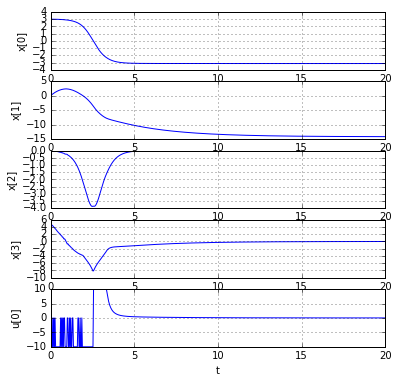

In [45]:
from inertial_wheel_pendulum import *
from IPython.display import HTML
from inertial_wheel_pendulum_visualizer import *
import matplotlib.pyplot as plt

def badCalibration(x, offset):
    #poor calibration of the encoder on the base of the flywheel pendulum
    #in this case the state x is a set of angles + angular velocities
    #so offset should be in radians
    x[0] = x[0] + offset
    x_bad = x
    return x_bad

def underPowered(u0, offset):
    #underpowered base of pendulum actuator
    
    coeff = 1-offset
    u0 = coeff*u0
    return u0
    
def in_backlash_zone(x1, prevx1, rad_backlash, rad_tooth): 
    #t_i = ideal tooth thickness
    #t_a = actual tooth thickness
    #1 rotation of x_slices
    rot_sliced = (2*math.pi)/(rad_backlash+rad_tooth)
    
    # assume x= 0 starts on a tooth    

    backlash_zone = [] 
    
    start = 0
    while start < (2*math.pi):
        start = start + rad_tooth
        backlash_zone +=  [(start, start+rad_backlash)]
        start = start + rad_backlash
    
    if backlash_zone[-1][1] > (2*math.pi):
        backlash_zone = backlash_zone[:-1]
       
    
    if x1 > (2*math.pi):
        numRots = x1/(2*math.pi)
        x1 = x1 - floor(numRots)*(2*math.pi)
                
    
    for elt in backlash_zone: 
        if (x1 >= elt[0]) and (x1 <= elt[1]):
            return True
        
    return False
    
    
#try the above ones with the flywheel actuator?? 
#try using traj_opt 

def lqr_controller(x):
    # This should return a 1x1 u that is bounded
    # between -input_max and input_max.
    # Remember to wrap the angular values back to
    # [-pi, pi].
    
    u = np.zeros((1, 1))
    global xf, uf, K

    ''' 
    Code submission for 3.3: fill in the code below
    to use your computed LQR controller (i.e. gain matrix
    K) to stabilize the robot by setting u appropriately.
    '''
    
    offsetRad = 0 #pi/20 = 0.157, pi/50 = 0.0628. pi/100 = 0.0314
    offsetPwr = 0
    rad_backlash = 0.04
    rad_tooth = 0.05
    
    #if in_backlash_zone(x[0], rad_backlash, rad_tooth):
        

    x_lin = x - xf
    x_lin[0:2] = ( x_lin[0:2] + math.pi) % (2 * math.pi ) - math.pi
    u = -np.dot(K, x_lin)
    u[0] = max(-input_max, min(input_max, u[0]))
    
    if rad_backlash != 0:
        if in_backlash_zone(x[1], prev_x1, rad_backlash, rad_tooth):
            u[0] = 0
            x[1] = x[1] + rad_backlash      
    
    return u


# Run forward simulation from the specified initial condition
duration = 20.
x0 = [3, 0.0, 0.0, 5.0]
global prev_x0
prev_x1 = 3
input_log, state_log = \
    RunSimulation(pendulum_plant,
              lqr_controller,
              x0=x0,
              duration=duration)

    
# Visualize state and input traces
fig = plt.figure().set_size_inches(6, 6)
for i in range(4):
    plt.subplot(5, 1, i+1)
    plt.plot(state_log.sample_times(), state_log.data()[i, :])
    plt.grid(True)
    plt.ylabel("x[%d]" % i)
plt.subplot(5, 1, 5)
plt.plot(input_log.sample_times(), input_log.data()[0, :])
plt.ylabel("u[0]")
plt.xlabel("t")
plt.grid(True)

# Visualize the simulation
viz = InertialWheelPendulumVisualizer(pendulum_plant)
ani = viz.animate(input_log, state_log, 30, repeat=True)
plt.close(viz.fig)
HTML(ani.to_html5_video())

## 3.4 LQR Region of Attraction, Prologue (2 points, 2/2 autograded)

As you probably found when playing with the LQR simulation in the previous question, there are plenty of states for which the LQR doesn't converge. **Find an x0 from which LQR does *not* converge, and an x0 from which is does, and write them below.**

In [39]:
'''
Code submission for 3.4
'''
def get_x0_does_not_converge():
    return [math.pi, 0.0, 0.0, 0.0]
def get_x0_does_converge():
    return [math.pi, 0.0, 0.0, 0.0]

## 3.5 LQR Region of Attraction, Episode 1 (5 points, 2/5 autograded)

What we would like to know is when the LQR controller will work, and when it won't. Let's see if we can analyze the region of attraction of this controller using the tools of Lyapunov stability analysis.

The closed-loop system dynamics of our system when using the LQR controller are

$$ \dot{x} = f(x, -K(x-x_f)) $$

A function that we know is a decent Lyapunov function near $x_f$ is the cost-to-go of the LQR solution: $V = \bar{x}^T S \bar{x}$.

Following section [10.3 of the textbook](http://underactuated.csail.mit.edu/underactuated.html?chapter=lyapunov), we just need to find a $\rho$ such that

$$ 
\dot{V}(x) \prec 0, \ \ \  \forall x : V(x) > 0
$$

to demonstrate the running LQR on our full (nonlinear!) system from state $x_0$ will converge as long as $V(x_0) \leq \rho$.

Let's start by calculating $\dot{V}(x)$ and $\dot{V}(x)$ for the full system. **Using the helper function *evaluate_f(x, u)* (it's a member of InertialWheelPendulum in *inertial_wheel_pendulum.py*) to fill out *calcV* and *calcVdot* to do this.**

Running this cell will populate the variables *V_samples*, *f_samples*, and *Vdot_samples* in the plane where $\theta_2 = 0$. Feel free to tweak those the sample grid (defined by n_bins, theta_widthm, etc) as you wish, but we'll be using these samples to estimate the region of attraction, so keep the resolution as high as you can while keeping the runtime reasonable. (We are, unfortunately, sampling in 3 dimensions...)

In [40]:
import matplotlib.pyplot as plt
import time

# Calculates the closed loop f(x) at xn
def calcF(xn):
    # Feel free to bring in whatever
    # global variables you need, e.g.:
    global pendulum_plant
    
    '''
    Code submission for 3.5: populate
    this function to calculate the closed-loop
    system dynamics f(x) at the input point.
    '''
    u = lqr_controller(xn)
    return pendulum_plant.evaluate_f(u, xn)

# Calculates V(xn)
def calcV(xn):
    # Feel free to bring in whatever
    # global variables you need

    '''
    Code submission for 3.5: populate
    this function to calculate V(x)
    at the input point.
    '''
    global S, xf
    x_err = xn - xf
    x_err[0:2] = ( x_err[0:2] + math.pi) % (2 * math.pi ) - math.pi
    return np.dot(x_err, np.dot(S, x_err))

# Calculates \dot{V}(xn).
def calcVdot(xn):
    # Feel free to bring in whatever
    # global variables you need
    
    '''
    Code submission for 3.5: populate
    this function to calculate Vdot(x)
    at the input point.
    '''
    global xf
    
    x_err = xn - xf
    x_err[0:2] = ( x_err[0:2] + math.pi) % (2 * math.pi ) - math.pi
    # It's important to still calculate F using xn, not
    # the error coordinate.
    return np.dot(np.dot(S, x_err), calcF(xn))

start_time = time.time()

# Sample f, V, and Vdot over
# a grid defined by these parameters.
# (Odd numbers are good because there'll be
# a bin at exactly the origin.
# These are slightly strange numbers as we've
# tried to default these to something as small
# as possible while still giving reasonable results.
# Feel free to increase if your computer and patience
# can handle it.)
n_bins = 41
n_bins_theta2d = 7
# For theta and thetad, we only need to span
# a small region around the fixed point
theta_width = 4
thetad_width = 4
# For \dot{theta_2}, though, the default
# parameters for our pendulum lead us to
# need to search larger absolute \dot{theta_2}
# values (because the inertial wheel is relatively
# light).
theta2d_width = 50

# Do the actual sampling....
x = np.linspace(xf[0]-theta_width, xf[0]+theta_width, n_bins)
y = np.linspace(xf[2]-thetad_width, xf[2]+thetad_width, n_bins)
z = np.linspace(xf[3]-theta2d_width, xf[3]+theta2d_width, n_bins_theta2d)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

def calc_over_array(f):
    return np.array([[[f([dx, 0., dy, dz]) for dz in z] for dx in x] for dy in y])

V_samples = calc_over_array(calcV)
f_samples = calc_over_array(calcF)
Vdot_samples = calc_over_array(calcVdot)

elapsed = time.time() - start_time
print "Computed %d x %d x %d sampling in %f seconds" % (n_bins, n_bins, n_bins_theta2d, elapsed)

Computed 41 x 41 x 7 sampling in 3.298055 seconds


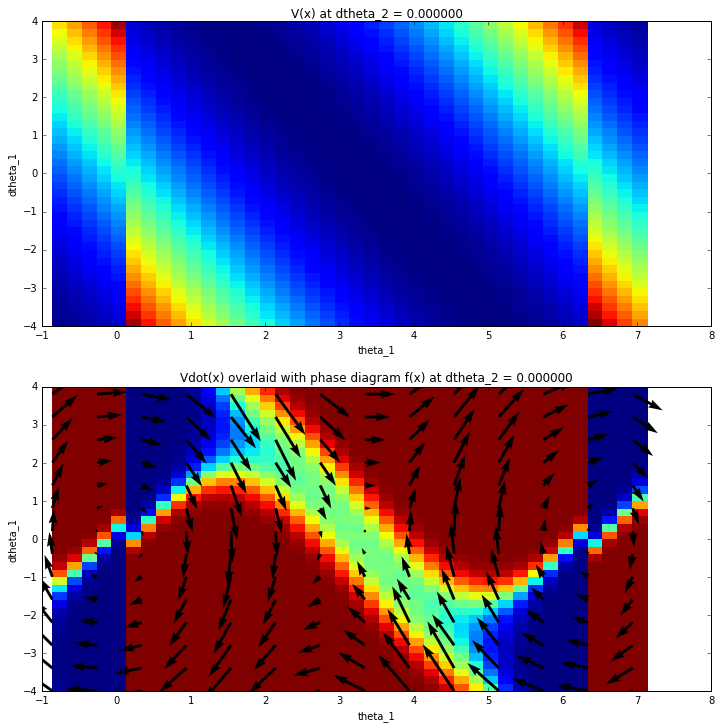

In [41]:
# This cell plots the samples using color-coded plots.
# Color coding:
#   V: blue = low-value, red = high-value
#   Vdot: blue = low value, yellow = around 0, red = high value
# The plot of Vdot is overlayed with a quiver plot of the samples
# of f.

# Select with slice of \dot{theta_2} we'll
# plot... this slice should be close to 0,
# as it's the middle bin.
theta2d_plotting_slice = n_bins_theta2d / 2

plt.figure().set_size_inches(12,12)

# Plot V
Xplot, Yplot = np.meshgrid(x, y)
plt.subplot(2, 1, 1)
plt.pcolormesh(Xplot, Yplot, V_samples[:, :, theta2d_plotting_slice])
plt.title("V(x) at dtheta_2 = %f" % z[theta2d_plotting_slice])
plt.xlabel("theta_1")
plt.ylabel("dtheta_1")

# Plot Vdot
# Use a sigmoid to try to squash the huge range of Vdot
# into something more visually appealing.
def sigmoid(x):
    return 1 / (1 + np.exp(-x/1000.))

plt.subplot(2, 1, 2)
Vdot_viz = sigmoid(Vdot_samples[:, :, theta2d_plotting_slice])
plt.pcolormesh(Xplot, Yplot, Vdot_viz, vmin=0, vmax=1.0)
plt.title("Vdot(x) overlaid with phase diagram f(x) at dtheta_2 = %f" % z[theta2d_plotting_slice])
plt.xlabel("theta_1")
plt.ylabel("dtheta_1")

# Don't plot a quiver arrow at *every* point, but instead
# every ds points
# (lower = more quiver arrows)
ds = 3
plt.quiver(Xplot[::ds, ::ds], 
           Yplot[::ds, ::ds], 
           f_samples[::ds, ::ds, 
           theta2d_plotting_slice, 0], f_samples[::ds, ::ds, theta2d_plotting_slice, 2]);

## 3.6 LQR Region of Attraction, Episode 2 (6 points, 3/6 autograded)

Now you should have access to (many samples from) your candidate $V$ and $\dot{V}$. One approach you could use from here is to estimate the region of attraction from these samples. Let's do that -- **use Theorem 10.5 from the textbook to estimate the largest region of attraction that you can for the LQR controller you derived above -- that is, find the biggest value of $\rho$ such that at every point $x_i$ where $V(x_i) \leq \rho$, $\dot{V}(x_i) \prec 0$.**

(Hint: it'll be easiest to do this by finding counterexample -- e.g., the point $x_i$ with the smallest $V(x_i)$ where $\dot{V}(x_i) \geq 0$.)

Region of attraction estimated at V(x) <=  96.2136528461
Area of your region of attraction:  2.08190047718


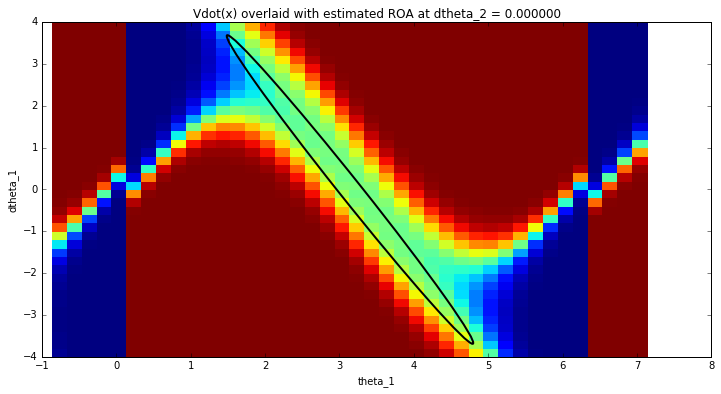

In [42]:
def estimate_rho(V, Vdot):
    '''
    Code submission for 3.6
    Fill in this function to use the samples of V and Vdot
    (Each array has dimension [n_bins, n_bins, n_bins_theta2d])
    to compute a maximal rho indicating the region of attraction
    of the fixed point at the upright.
    '''
    
    smallest_counterexample_V = np.max(V)
    for dx in range(V.shape[0]):
        for dy in range(V.shape[1]):
            for dz in range(V.shape[2]):
                if Vdot[dx, dy, dz] >= 0 and V[dx, dy, dz] < smallest_counterexample_V:
                    if V[dx, dy, dz] != 0:
                        smallest_counterexample_V = V[dx, dy, dz]
    # If we take rho slightly smaller, we protect ourselves against
    # discretization problems (maybe we didn't sample exactly at the true rho,
    # so we may have overestimated). It's likely that all V lower than this number
    # have negative Vdot, so we've found the ROA.
    return smallest_counterexample_V - 0.01
    
    return 0.

rho = estimate_rho(V_samples, Vdot_samples)
print "Region of attraction estimated at V(x) <= ", rho

# Plot Vdot again, but overlay the region of attraction -- which,
# for quadratic V, is an ellipse.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(12,6)
plt.pcolormesh(Xplot, Yplot, Vdot_viz, vmin=0, vmax=1.0)

# The part of S we care about is the 2x2 submatrix from the 1st and 3rd rows
# and columns.
S_sub = np.reshape(S[[0, 2, 0, 2], [0, 0, 2, 2]], (2, 2))
# Extract its eigenvalues and eigenvectors, which tell us
# the axes of the ellipse
ellipseInfo = np.linalg.eig(S_sub)
# Eigenvalues are 1/r^2, Eigenvectors are axis directions
axis_1 = ellipseInfo[1][0, :]
if ellipseInfo[0][0] > 0 and ellipseInfo[0][1] > 0:
    r1 = math.sqrt(rho)/math.sqrt(ellipseInfo[0][0])
    axis_2 = ellipseInfo[1][1, :]
    r2 = math.sqrt(rho)/math.sqrt(ellipseInfo[0][1])
    angle = math.atan2(-axis_1[1], axis_1[0])
    from matplotlib.patches import Ellipse
    ax.add_patch(Ellipse((xf[0], xf[2]), 
                         2*r1, 2*r2, 
                         angle=angle*180./math.pi, 
                         linewidth=2, fill=False, zorder=2));
    
    # Report an interesting number that is easy to compute
    # from the ellipse info
    print "Area of your region of attraction: ", math.pi * r1 * r2
else:
    print "S_sub had nonpositive eigenvalues. That shouldn't happen."
    
plt.title("Vdot(x) overlaid with estimated ROA at dtheta_2 = %f" % z[theta2d_plotting_slice])
plt.xlabel("theta_1")
plt.ylabel("dtheta_1");

## 3.7 LQR Region of Attraction, Intermission (3 points)

1) Is this sufficient proof that LQR *would* work starting from $x_0$ *inside* region of attraction (ignoring sampling errors)? 

2) What about the opposite -- is this sufficient proof that LQR *would not* work starting from $x_0$ *outside* of this region of attraction?

3) If you answer to (2) is No, speculate what strategies we could use to find larger regions of attraction. (For example, could changing V increase the largest ROA we could guarantee? How could we formulate search over V?)

**Short answer explanation for 3.7**

1) YOUR ANSWER HERE

2) YOUR ANSWER HERE

3) YOUR ANSWER HERE

## 3.8 Combined Swing-up and Stabilization (8 points, 4/8 autograded)

Finally, we're ready for the main event! **Write a controller that will accomplish the task of swinging up the inertial pendulum to its upright fixed point from any initial condition. Your controller should use a custom swingup controller to get close to the unstable fixed point, and then switch to LQR to stay there. Use your estimated region of attraction to decide when it's safe to switch to LQR. A framework for setting up this hybrid controller is provided below for your convenience.**

To accomplish swing-up, apply energy shaping to $\theta$ via non-collocated feedback linearization. (Energy shaping for $\theta$ should follow from the simple pendulum, so you just need figure out how to use your non-collocated input $\tau$ to directly apply torque on $\theta$.)

While we'll look at your code, we'll also rely on the autograder to test your system from a variety of initial conditions. (You can try the autograder with the cell at the bottom of the notebook.) Besides the random initial conditions we'll test, we'll also check:
- $x = \left[ 0, 0, 0, 0 \right] $
- $x = \left[ \pi, 0, 0, 0 \right] $
- $x = \left[ 3\pi, 0, 0, 0 \right] $
- $x = \left[ 0, -100, 0, 0 \right] $
- $x = \left[ 0, 0, 0, 20 \right] $

Make sure you can handle these corner cases!

In [1]:
# The swingup controller should accept a state x,
# and return a control input u (a 1x1 numpy array)
# that respects the plant's input limits.
def swingup_controller(x):
    # Here's some useful things...
    q = x[0:2]
    qd = x[2:4]
    (M, C, tauG, B) = pendulum_plant.GetManipulatorDynamics(q, qd)
    
    ''' 
    Code response for problem 3.8:
    Fill in this swingup controller to control the pendulum
    energy to the homonclinic orbit.
    (You'll probably want to ensure that your controller
    controls the velocity of the inertial wheel, too, using whatever
    means you think are reasonable.)
    '''
    u = np.array([0.])
    return u

def combined_controller(x):
    ''' 
    Code response for problem 3.8:
    Fill in this combined controller to dispatch to either the
    swingup or lqr controller by checking the state against your
    calculated region of attraction.
    '''
    u = np.array([0.])
    return u

# Simulate!
x0 = [2.0, 0.0, -0.5, 100.]
duration = 30
input_log, state_log = RunSimulation(pendulum_plant,
                        combined_controller,
                        x0 = x0,
                        duration = duration)

# Plot traces of the results
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(12,12)
for i in range(4):
    plt.subplot(5, 1, i+1)
    plt.plot(state_log.sample_times(), state_log.data()[i, :])
    plt.grid(True)
    plt.ylabel("x[%d]" % i)
plt.subplot(5, 1, 5)
plt.plot(input_log.sample_times(), input_log.data()[0, :])
plt.ylabel("u[0]")
plt.xlabel("t")
plt.grid(True)

NameError: name 'RunSimulation' is not defined

In [20]:
from IPython.display import HTML
from inertial_wheel_pendulum_visualizer import *

viz = InertialWheelPendulumVisualizer(pendulum_plant)
ani = viz.animate(input_log, state_log, 30, repeat=True)
plt.close(viz.fig)
HTML(ani.to_html5_video())

## Test your own implementations

Running the cell below will run your implemented functions against unit tests.

Don't change the cell below, or the test_set_3.py file. We will grade your implementations against the original files.

Make sure to SAVE your notebook before running tests. (File --> Save and Checkpoint, or use the hotkey which should be ctrl+s on linux, cmd+s on osx, etc)

**Warning: these take a little while to run, so run them sparingly!** (They test your code by testing the inertial pendulum from lots of initial conditions...) You can speed it up a little by decreasing the time it takes to run every part of the notebook (e.g. sample V less frequently in 3.5, simulate plants for a shorter duration.)

In [20]:
import os
# Run the test in a subprocess, to make sure it doesn't open any plots...
os.popen("python test_set_3.py ./ test_results.json")

# Print the results json for review
import test_set_3
print test_set_3.pretty_format_json_results("test_results.json")

TOTAL SCORE (automated tests only): 0.00
  * Unknown exception while setting up: Traceback (most recent call last):
  * File "test_set_3.py", line 457, in run_tests     lambda:
  * imp.load_source('set_3_for_testing',
  * '/tmp/set_3_for_testing.py'))() NameError: global name 'offset' is
  * not defined




## Feedback Survey

We'd really appreciate your feedback on this set, and on the class so far! Anonymous survey [available here](https://goo.gl/forms/gSqeSnMdY8WHeCiC2).